# Still in progress, I am a beginner so incase of any correction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import glob
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta, Adamax
from keras.utils import to_categorical
from matplotlib import pyplot



import os
print(os.listdir("../input/cell_images/cell_images/"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['Uninfected', 'Parasitized']


# Loading and Preprocessing the Data

In [2]:
images = []
labels = []

path1 = "../input/cell_images/cell_images/Parasitized/"
path2 = "../input/cell_images/cell_images/Uninfected/"


for i in glob.glob(os.path.join(path1,'*png')):
    img = cv2.imread(i)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images.append(np.array(img))
    labels.append(0)
    
for j in glob.glob(os.path.join(path2,'*png')):
    img = cv2.imread(j)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images.append(np.array(img))
    labels.append(1)    
    




In [3]:
   
    
cells , labels = np.array(images), np.array(labels)    
np.save("cells",cells)
np.save("labels",labels)
the_cells, the_labels = np.load("cells.npy") , np.load("labels.npy")



# Plotting some images of the labelled dataset

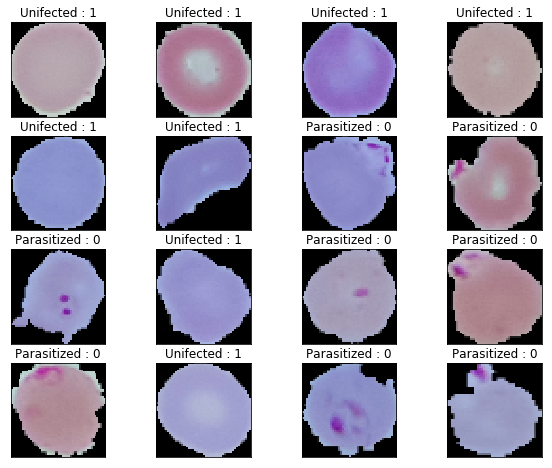

In [4]:

fig=plt.figure(figsize=(10, 8))
n = 16
for i in range(n):
    img = np.random.randint(0, the_cells.shape[0] , 1)
    fig.add_subplot(n**(.5), n**(.5), i+1)
    plt.imshow(the_cells[img[0]])
    plt.title('{} : {}'.format('Unifected' if the_labels[img[0]] == 1 else 'Parasitized' ,
                                the_labels[img[0]]) )
    plt.xticks([]) , plt.yticks([])
        
plt.show()

# Splitting and Normalizing the data

In [5]:
    X_train, X_test, Y_train, Y_test = train_test_split(the_cells, the_labels, test_size=0.2)
    
    #converting to float and normalizing
    X_train = X_train.astype('float32')/255 
    X_test = X_test.astype('float32')/255
    
    #getting the numbr of unique classes in the labels
    num_classes=len(np.unique(the_labels))

    #One hot encoding as classifier since we  has multiple classes
    Y_train=keras.utils.to_categorical(Y_train,num_classes)
    Y_test=keras.utils.to_categorical(Y_test,num_classes)

# Defining a simple model

## fully connected neural network

In [6]:
# import regularizer
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)

In [7]:
from keras.layers import Dense, Activation


nnmodel = Sequential()
nnmodel.add(Dense(32, input_shape=(50,50,3)))
nnmodel.add(Activation('relu'))
nnmodel.add(Flatten())
nnmodel.add(Dense(2,activation="softmax"))#, activity_regularizer=l1(0.001))) 
nnmodel.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50, 50, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 160002    
Total params: 160,130
Trainable params: 160,130
Non-trainable params: 0
_________________________________________________________________


In [8]:
nnmodel.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.001),metrics=['mae', 'acc'])

nnhistory =nnmodel.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 22046 samples, validate on 5512 samples
Epoch 1/100
22046/22046 [==============================] - 4s 177us/step - loss: 0.6699 - mean_absolute_error: 0.4741 - acc: 0.5843 - val_loss: 0.6614 - val_mean_absolute_error: 0.4643 - val_acc: 0.5985
Epoch 2/100
22046/22046 [==============================] - 3s 129us/step - loss: 0.6407 - mean_absolute_error: 0.4530 - acc: 0.6319 - val_loss: 0.6746 - val_mean_absolute_error: 0.4499 - val_acc: 0.5769
Epoch 3/100
22046/22046 [==============================] - 3s 129us/step - loss: 0.6264 - mean_absolute_error: 0.4413 - acc: 0.6474 - val_loss: 0.6408 - val_mean_absolute_error: 0.4362 - val_acc: 0.6323
Epoch 4/100
22046/22046 [==============================] - 3s 131us/step - loss: 0.6204 - mean_absolute_error: 0.4332 - acc: 0.6520 - val_loss: 0.6149 - val_mean_absolute_error: 0.4277 - val_acc: 0.6640
Epoch 5/100
22046/22046 [==============================] - 3s 128us/step - loss: 0.6150 - m

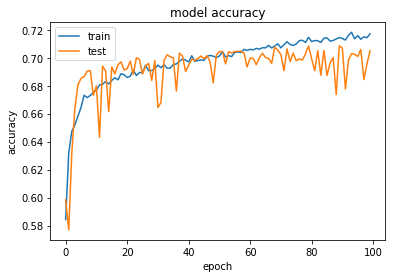

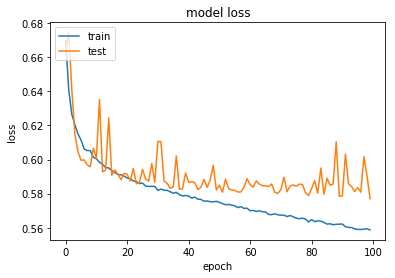

In [9]:
# summarize history for accuracy
plt.plot(nnhistory.history['acc'])
plt.plot(nnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test' ], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nnhistory.history['loss'])
plt.plot(nnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

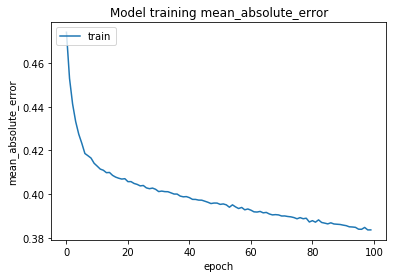

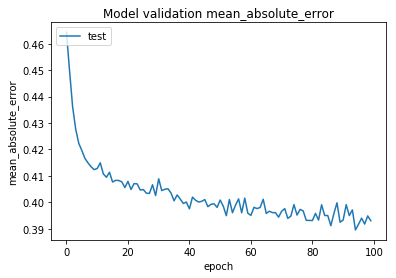

In [10]:
plt.plot(nnhistory.history['mean_absolute_error'])
plt.title('Model training mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(nnhistory.history['val_mean_absolute_error'])
plt.title('Model validation mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['test' ], loc='upper left')
plt.show()

## Convolutional Neural Network

In [11]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(2,activation="softmax",activity_regularizer=l1(0.001)))#2 represent output layer neurons 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                230450    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total para

# Plotting the Loss and Accuracy

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['mae', 'acc'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1)

Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 179us/step - loss: 0.6933 - mean_absolute_error: 0.4733 - acc: 0.6026 - val_loss: 0.6600 - val_mean_absolute_error: 0.4532 - val_acc: 0.6624
Epoch 2/10
22046/22046 [==============================] - 3s 133us/step - loss: 0.6522 - mean_absolute_error: 0.4358 - acc: 0.6566 - val_loss: 0.6261 - val_mean_absolute_error: 0.4213 - val_acc: 0.6948
Epoch 3/10
22046/22046 [==============================] - 3s 133us/step - loss: 0.6236 - mean_absolute_error: 0.4120 - acc: 0.6848 - val_loss: 0.5973 - val_mean_absolute_error: 0.3980 - val_acc: 0.7170
Epoch 4/10
22046/22046 [==============================] - 3s 134us/step - loss: 0.5812 - mean_absolute_error: 0.3841 - acc: 0.7215 - val_loss: 0.5470 - val_mean_absolute_error: 0.3604 - val_acc: 0.7634
Epoch 5/10
22046/22046 [==============================] - 3s 134us/step - loss: 0.5093 - mean_absolute_error: 0.3372 - acc: 0.7754 - val_loss: 

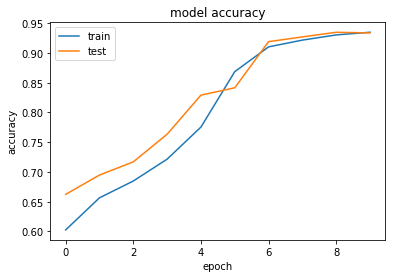

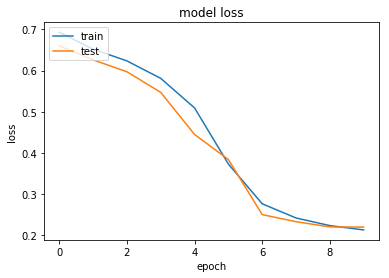

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

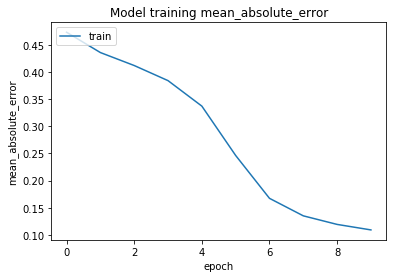

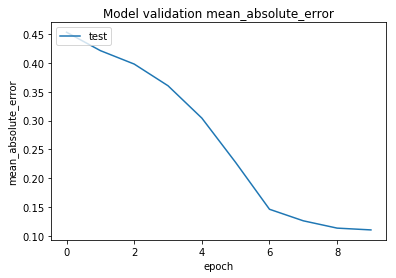

In [14]:
plt.plot(history.history['mean_absolute_error'])
plt.title('Model training mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model validation mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['test' ], loc='upper left')
plt.show()

# Organizing the Model

In [15]:
# split data set 
def loadingdata():
    #splitting
    X_train, X_test, Y_train, Y_test = train_test_split(the_cells, the_labels, test_size=0.2)
    
    #converting to float and normalizing
    X_train = X_train.astype('float32')/255 
    X_test = X_test.astype('float32')/255
    
    #getting the numbr of unique classes in the labels
    num_classes=len(np.unique(the_labels))

    #One hot encoding as classifier since we  has multiple classes
    Y_train=keras.utils.to_categorical(Y_train,num_classes)
    Y_test=keras.utils.to_categorical(Y_test,num_classes)

    return X_train, Y_train, X_test, Y_test

In [16]:
# here the model is initialized and fitted, accuracy and losses as well as varying learnig curves are plotted 
def MyCNNmodel(X_train, Y_train, X_test, Y_test, lrate):

    model = Sequential()
    model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    #model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))    
    model.add(Dense(50,activation="relu"))
    model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
    #model.summary()
    ## compiling the model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mae', 'acc'])
    # fit model
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1)
    #history = model.fit(X_train, Y_train, validation_split=0.33, epochs=20, batch_size=10, verbose=1)
    #print(history.history.keys())
    
#     # summarize history for accuracy
#     plt.plot(history.history['acc'])
#     plt.plot(history.history['val_acc'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     #plt.show()
    
    # plot learning curves
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='val')
    plt.title('lrate='+str(lrate), pad=-50)

     

# Plotting the Learning Rates

Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 3s 141us/step - loss: 8.0480 - acc: 0.4985 - val_loss: 7.9479 - val_acc: 0.5069
Epoch 2/10
22046/22046 [==============================] - 3s 131us/step - loss: 8.0868 - acc: 0.4983 - val_loss: 7.9479 - val_acc: 0.5069
Epoch 3/10
22046/22046 [==============================] - 3s 135us/step - loss: 8.0868 - acc: 0.4983 - val_loss: 7.9479 - val_acc: 0.5069
Epoch 4/10
22046/22046 [==============================] - 3s 136us/step - loss: 8.0868 - acc: 0.4983 - val_loss: 7.9479 - val_acc: 0.5069
Epoch 5/10
22046/22046 [==============================] - 3s 135us/step - loss: 8.0868 - acc: 0.4983 - val_loss: 7.9479 - val_acc: 0.5069
Epoch 6/10
22046/22046 [==============================] - 3s 130us/step - loss: 8.0868 - acc: 0.4983 - val_loss: 7.9479 - val_acc: 0.5069
Epoch 7/10
22046/22046 [==============================] - 3s 128us/step - loss: 8.0868 - acc: 0.4983 - val_loss: 7.9479 - v

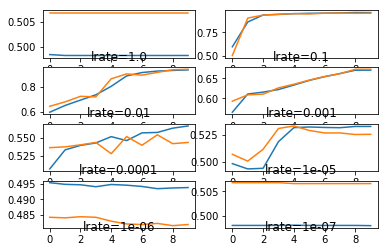

In [17]:
      
# prepare dataset
X_train, Y_train, X_test, Y_test = loadingdata()
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    MyCNNmodel(X_train, Y_train, X_test, Y_test, learning_rates[i])
# show learning curves
plt.show()

# Classification Report and Confusion Matrix

In [18]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1) 
y_true = Y_test
y_true=np.argmax(y_true, axis=1) 


print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2794
           1       0.91      0.97      0.94      2718

   micro avg       0.94      0.94      0.94      5512
   macro avg       0.94      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



In [19]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[2542,  252],
       [  89, 2629]])

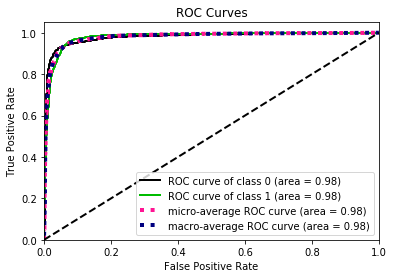

In [20]:
import scikitplot 
import matplotlib.pyplot as plt

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
y_probas = model.predict(X_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
plt.show()

In [21]:
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Variations of the models for Hyperparameter Optimization

view how the models loss and accuracy and loss changes
1. fcn2layer, lr = 0.01, beta = 0,reg=0, epochs = 10
2. fcn2layer+reg, lr = 0.01, beta = 0,reg=0.001, epochs = 10
3. fcn2layer+lr1, lr = 0.001, beta = 0,reg=0, epochs = 10
4. fcn2layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
5. fcn3layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
6. fcn3layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
7. fcn4layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10

and also when the nodes changes
1. fcn2layer, nodes = 32
2. fcn2layer, nodes = 64
3. fcn2layer, nodes = 128


where: lr = learning rate, reg = regularization




In [22]:
# import regularizer
from keras.regularizers import l1,l2
# instantiate regularizer
reg = l1(0.001)
reg2 = l2(0.001)

In [23]:
nn1model = Sequential()
nn1model.add(Dense(32, input_shape=(50,50,3)))
nn1model.add(Activation('relu'))
nn1model.add(Flatten())
nn1model.add(Dense(2,activation="softmax"))#, activity_regularizer=l1(0.001))) 
#nn1model.summary()

nn1model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01),metrics=['accuracy'])

nn1history =nn1model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, verbose=1)

Train on 22046 samples, validate on 5512 samples
Epoch 1/300
22046/22046 [==============================] - 3s 153us/step - loss: 0.7171 - acc: 0.6286 - val_loss: 0.6111 - val_acc: 0.6753
Epoch 2/300
22046/22046 [==============================] - 3s 126us/step - loss: 0.6149 - acc: 0.6604 - val_loss: 0.5996 - val_acc: 0.6820
Epoch 3/300
22046/22046 [==============================] - 3s 127us/step - loss: 0.6051 - acc: 0.6718 - val_loss: 0.5908 - val_acc: 0.6840
Epoch 4/300
22046/22046 [==============================] - 3s 128us/step - loss: 0.5972 - acc: 0.6806 - val_loss: 0.5921 - val_acc: 0.6932
Epoch 5/300
22046/22046 [==============================] - 3s 128us/step - loss: 0.5907 - acc: 0.6886 - val_loss: 0.5843 - val_acc: 0.6970
Epoch 6/300
22046/22046 [==============================] - 3s 129us/step - loss: 0.5875 - acc: 0.6919 - val_loss: 0.5886 - val_acc: 0.6905
Epoch 7/300
22046/22046 [==============================] - 3s 128us/step - loss: 0.5836 - acc: 0.6946 - val_loss: 0.5

In [24]:
nn1model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 50, 50, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 80000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 160002    
Total params: 160,130
Trainable params: 160,130
Non-trainable params: 0
_________________________________________________________________


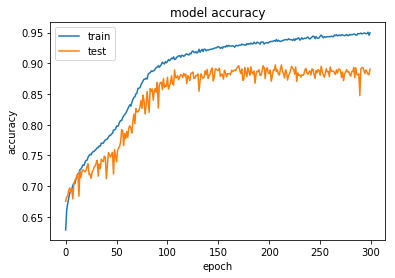

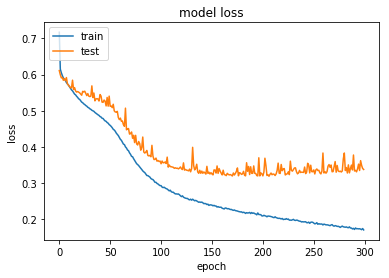

In [25]:
# summarize history for accuracy
plt.plot(nn1history.history['acc'])
plt.plot(nn1history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test' ], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn1history.history['loss'])
plt.plot(nn1history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
score = nn1model.evaluate(X_test, Y_test, verbose=1)
print('\n', 'Test_Loss:-', score[0])
print('\n', 'Test_Accuracy:-', score[1])

5512/5512 [==============================] - 0s 66us/step

 Test_Loss:- 0.3377318243308233

 Test_Accuracy:- 0.8904208998548622


In [27]:
from keras.layers import  Dropout, BatchNormalization

In [28]:
cnn1model = Sequential()
cnn1model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
#cnn1model.add(BatchNormalization())
cnn1model.add(MaxPooling2D(pool_size=2))
cnn1model.add(Dropout(0.25))      
cnn1model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
#cnn1model.add(BatchNormalization())
cnn1model.add(MaxPooling2D(pool_size=2))
cnn1model.add(Dropout(0.25))      
# cnn1model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# cnn1model.add(MaxPooling2D(pool_size=2))
# cnn1model.add(BatchNormalization())
#cnn1model.add(Dropout(0.25))      
cnn1model.add(Flatten())
cnn1model.add(Dense(50,activation="relu"))
cnn1model.add(Dense(2,activation="softmax", kernel_regularizer=l2(0.001)))#activity_regularizer=l1(0.001)))
#cnn1model.summary()
cnn1model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
cnn1history = cnn1model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, verbose=1)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 22046 samples, validate on 5512 samples
Epoch 1/300
22046/22046 [==============================] - 4s 176us/step - loss: 0.6697 - acc: 0.5954 - val_loss: 0.6519 - val_acc: 0.6286
Epoch 2/300
22046/22046 [==============================] - 3s 142us/step - loss: 0.6365 - acc: 0.6452 - val_loss: 0.6262 - val_acc: 0.6673
Epoch 3/300
22046/22046 [==============================] - 3s 143us/step - loss: 0.6096 - acc: 0.6726 - val_loss: 0.5954 - val_acc: 0.7068
Epoch 4/300
22046/22046 [==============================] - 3s 145us/step - loss: 0.5758 - acc: 0.7056 - val_loss: 0.5423 - val_acc: 0.7415
Epoch 5/300
22046/22046 [==============================] - 3s 145us/step - loss: 0.5062 - acc: 0.7703 - val_loss: 0.4442 - val_acc: 0.8487
Epoch 6/300
22046/22046 [==============================] - 3s 146us/step - loss: 0.3633 - acc: 0.8624 - val_loss: 0.2878 - val_acc: 0.9111
Ep

In [29]:
cnn1model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4608)              0         
__________

In [30]:
score1 = cnn1model.evaluate(X_test, Y_test, verbose=1)
print('\n', 'Test_Loss:-', score1[0])
print('\n', 'Test_Accuracy:-', score1[1])

5512/5512 [==============================] - 0s 68us/step

 Test_Loss:- 0.18407978088674723

 Test_Accuracy:- 0.9553701015965167


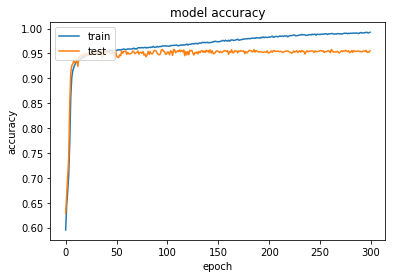

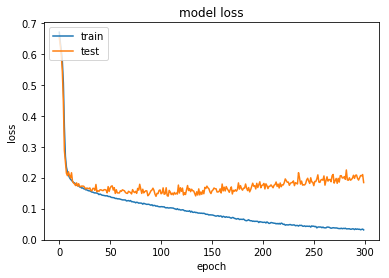

In [31]:
# summarize history for accuracy
plt.plot(cnn1history.history['acc'])
plt.plot(cnn1history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test' ], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn1history.history['loss'])
plt.plot(cnn1history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

# Comparing Several Keras Optimizers

## Optimizer 1: RMSprop

In [32]:
cnnmodel_rmsprop = Sequential()
cnnmodel_rmsprop.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_rmsprop.add(MaxPooling2D(pool_size=2))
cnnmodel_rmsprop.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_rmsprop.add(MaxPooling2D(pool_size=2))
cnnmodel_rmsprop.add(Flatten())
cnnmodel_rmsprop.add(Dense(50,activation="relu"))
cnnmodel_rmsprop.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_rmsprop.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])


Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 177us/step - loss: 0.5596 - acc: 0.7035 - val_loss: 0.3644 - val_acc: 0.8380
Epoch 2/10
22046/22046 [==============================] - 3s 143us/step - loss: 0.2352 - acc: 0.9131 - val_loss: 0.1861 - val_acc: 0.9320
Epoch 3/10
22046/22046 [==============================] - 3s 143us/step - loss: 0.1830 - acc: 0.9358 - val_loss: 0.1654 - val_acc: 0.9514
Epoch 4/10
22046/22046 [==============================] - 3s 142us/step - loss: 0.1672 - acc: 0.9470 - val_loss: 0.1844 - val_acc: 0.9421
Epoch 5/10
22046/22046 [==============================] - 3s 143us/step - loss: 0.1579 - acc: 0.9485 - val_loss: 0.2635 - val_acc: 0.9058
Epoch 6/10
22046/22046 [==============================] - 3s 142us/step - loss: 0.1539 - acc: 0.9502 - val_loss: 0.1595 - val_acc: 0.9507
Epoch 7/10
22046/22046 [==============================] - 3s 145us/step - loss: 0.1522 - acc: 0.9506 - val_loss: 0.1611 - v

## Optimizer 2: Adam

In [33]:
cnnmodel_adam = Sequential()
cnnmodel_adam.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_adam.add(MaxPooling2D(pool_size=2))
cnnmodel_adam.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adam.add(MaxPooling2D(pool_size=2))
cnnmodel_adam.add(Flatten())
cnnmodel_adam.add(Dense(50,activation="relu"))
cnnmodel_adam.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
cnnmodel_adam.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
hist_adam = cnnmodel_adam.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])


Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 188us/step - loss: 0.5862 - acc: 0.6872 - val_loss: 0.4439 - val_acc: 0.8191
Epoch 2/10
22046/22046 [==============================] - 3s 149us/step - loss: 0.2476 - acc: 0.9056 - val_loss: 0.1978 - val_acc: 0.9231
Epoch 3/10
22046/22046 [==============================] - 3s 148us/step - loss: 0.1889 - acc: 0.9311 - val_loss: 0.1872 - val_acc: 0.9311
Epoch 4/10
22046/22046 [==============================] - 3s 149us/step - loss: 0.1646 - acc: 0.9411 - val_loss: 0.1722 - val_acc: 0.9365
Epoch 5/10
22046/22046 [==============================] - 3s 148us/step - loss: 0.1537 - acc: 0.9457 - val_loss: 0.1659 - val_acc: 0.9467
Epoch 6/10
22046/22046 [==============================] - 3s 148us/step - loss: 0.1411 - acc: 0.9509 - val_loss: 0.1736 - val_acc: 0.9450
Epoch 7/10
22046/22046 [==============================] - 3s 148us/step - loss: 0.1303 - acc: 0.9547 - val_loss: 0.1665 - v

## Optimizer 3: Nadam

In [34]:
cnnmodel_nadam = Sequential()
cnnmodel_nadam.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_nadam.add(MaxPooling2D(pool_size=2))
cnnmodel_nadam.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_nadam.add(MaxPooling2D(pool_size=2))
cnnmodel_nadam.add(Flatten())
cnnmodel_nadam.add(Dense(50,activation="relu"))
cnnmodel_nadam.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
cnnmodel_nadam.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])
hist_nadam = cnnmodel_nadam.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])


Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 198us/step - loss: 0.5153 - acc: 0.7273 - val_loss: 0.2375 - val_acc: 0.9233
Epoch 2/10
22046/22046 [==============================] - 3s 157us/step - loss: 0.1924 - acc: 0.9306 - val_loss: 0.1992 - val_acc: 0.9292
Epoch 3/10
22046/22046 [==============================] - 3s 157us/step - loss: 0.1624 - acc: 0.9423 - val_loss: 0.1669 - val_acc: 0.9396
Epoch 4/10
22046/22046 [==============================] - 3s 158us/step - loss: 0.1374 - acc: 0.9532 - val_loss: 0.1654 - val_acc: 0.9478
Epoch 5/10
22046/22046 [==============================] - 3s 158us/step - loss: 0.1177 - acc: 0.9581 - val_loss: 0.1716 - val_acc: 0.9432
Epoch 6/10
22046/22046 [==============================] - 3s 157us/step - loss: 0.1009 - acc: 0.9644 - val_loss: 0.1662 - val_acc: 0.9510
Epoch 7/10
22046/22046 [==============================] - 3s 156us/step - loss: 0.0850 - acc: 0.9693 - val_loss: 0.1610 - v

## Optimizer 4: SGD

In [35]:
cnnmodel_sgd= Sequential()
cnnmodel_sgd.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_sgd.add(MaxPooling2D(pool_size=2))
cnnmodel_sgd.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgd.add(MaxPooling2D(pool_size=2))
cnnmodel_sgd.add(Flatten())
cnnmodel_sgd.add(Dense(50,activation="relu"))
cnnmodel_sgd.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_sgd = cnnmodel_sgd.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])



Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 180us/step - loss: 0.6568 - acc: 0.6159 - val_loss: 0.6267 - val_acc: 0.6529
Epoch 2/10
22046/22046 [==============================] - 3s 140us/step - loss: 0.6184 - acc: 0.6561 - val_loss: 0.6008 - val_acc: 0.6805
Epoch 3/10
22046/22046 [==============================] - 3s 138us/step - loss: 0.5839 - acc: 0.6930 - val_loss: 0.5676 - val_acc: 0.6994
Epoch 4/10
22046/22046 [==============================] - 3s 138us/step - loss: 0.5445 - acc: 0.7259 - val_loss: 0.5154 - val_acc: 0.7558
Epoch 5/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.4798 - acc: 0.7743 - val_loss: 0.4247 - val_acc: 0.8175
Epoch 6/10
22046/22046 [==============================] - 3s 143us/step - loss: 0.3598 - acc: 0.8559 - val_loss: 0.2904 - val_acc: 0.8821
Epoch 7/10
22046/22046 [==============================] - 3s 143us/step - loss: 0.2522 - acc: 0.9067 - val_loss: 0.2323 - v

## Optimizer 5: SGD + Nesterov

In [36]:
cnnmodel_sgdnesterov = Sequential()
cnnmodel_sgdnesterov.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_sgdnesterov.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnesterov.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgdnesterov.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnesterov.add(Flatten())
cnnmodel_sgdnesterov.add(Dense(50,activation="relu"))
cnnmodel_sgdnesterov.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_sgdnesterov.compile(optimizer=SGD(nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_sgdnesterov = cnnmodel_sgdnesterov.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])


Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 183us/step - loss: 0.6725 - acc: 0.5856 - val_loss: 0.6392 - val_acc: 0.6509
Epoch 2/10
22046/22046 [==============================] - 3s 140us/step - loss: 0.6272 - acc: 0.6485 - val_loss: 0.6056 - val_acc: 0.6794
Epoch 3/10
22046/22046 [==============================] - 3s 141us/step - loss: 0.5903 - acc: 0.6857 - val_loss: 0.5744 - val_acc: 0.7023
Epoch 4/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.5450 - acc: 0.7273 - val_loss: 0.5075 - val_acc: 0.7629
Epoch 5/10
22046/22046 [==============================] - 3s 141us/step - loss: 0.4657 - acc: 0.7893 - val_loss: 0.3986 - val_acc: 0.8491
Epoch 6/10
22046/22046 [==============================] - 3s 140us/step - loss: 0.3269 - acc: 0.8760 - val_loss: 0.2678 - val_acc: 0.9046
Epoch 7/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.2418 - acc: 0.9104 - val_loss: 0.2416 - v

## Optimizer 6: SGD with momentum=0.9

In [37]:
cnnmodel_sgdmomentum = Sequential()
cnnmodel_sgdmomentum.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_sgdmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdmomentum.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgdmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdmomentum.add(Flatten())
cnnmodel_sgdmomentum.add(Dense(50,activation="relu"))
cnnmodel_sgdmomentum.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_sgdmomentum.compile(optimizer=SGD(momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_sgdmomentum = cnnmodel_sgdmomentum.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])



Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 183us/step - loss: 0.6563 - acc: 0.6013 - val_loss: 0.5906 - val_acc: 0.6854
Epoch 2/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.3929 - acc: 0.8227 - val_loss: 0.1959 - val_acc: 0.9345
Epoch 3/10
22046/22046 [==============================] - 3s 142us/step - loss: 0.1929 - acc: 0.9351 - val_loss: 0.1801 - val_acc: 0.9416
Epoch 4/10
22046/22046 [==============================] - 3s 140us/step - loss: 0.1593 - acc: 0.9460 - val_loss: 0.1668 - val_acc: 0.9468
Epoch 5/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.1466 - acc: 0.9506 - val_loss: 0.1623 - val_acc: 0.9476
Epoch 6/10
22046/22046 [==============================] - 3s 138us/step - loss: 0.1374 - acc: 0.9524 - val_loss: 0.1639 - val_acc: 0.9459
Epoch 7/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.1293 - acc: 0.9554 - val_loss: 0.1501 - v

## Optimizer 7: SGD + Nesterov with momentum=0.9

In [38]:
cnnmodel_sgdnestmomentum = Sequential()
cnnmodel_sgdnestmomentum.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_sgdnestmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnestmomentum.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgdnestmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnestmomentum.add(Flatten())
cnnmodel_sgdnestmomentum.add(Dense(50,activation="relu"))
cnnmodel_sgdnestmomentum.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_sgdnestmomentum.compile(optimizer=SGD(momentum=0.9, nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_sgdnestmomentum = cnnmodel_sgdnestmomentum.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])


Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 185us/step - loss: 0.4781 - acc: 0.7605 - val_loss: 0.2125 - val_acc: 0.9209
Epoch 2/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.2087 - acc: 0.9253 - val_loss: 0.1905 - val_acc: 0.9352
Epoch 3/10
22046/22046 [==============================] - 3s 140us/step - loss: 0.1780 - acc: 0.9404 - val_loss: 0.1831 - val_acc: 0.9416
Epoch 4/10
22046/22046 [==============================] - 3s 140us/step - loss: 0.1633 - acc: 0.9481 - val_loss: 0.1648 - val_acc: 0.9503
Epoch 5/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.1523 - acc: 0.9516 - val_loss: 0.1540 - val_acc: 0.9512
Epoch 6/10
22046/22046 [==============================] - 3s 139us/step - loss: 0.1384 - acc: 0.9554 - val_loss: 0.1580 - val_acc: 0.9488
Epoch 7/10
22046/22046 [==============================] - 3s 140us/step - loss: 0.1319 - acc: 0.9570 - val_loss: 0.1650 - v

## Optimizer 8:Adagrad

In [39]:
cnnmodel_adagrad = Sequential()
cnnmodel_adagrad.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_adagrad.add(MaxPooling2D(pool_size=2))
cnnmodel_adagrad.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adagrad.add(MaxPooling2D(pool_size=2))
cnnmodel_adagrad.add(Flatten())
cnnmodel_adagrad.add(Dense(50,activation="relu"))
cnnmodel_adagrad.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_adagrad.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_adagrad = cnnmodel_adagrad.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])



Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 4s 194us/step - loss: 0.5937 - acc: 0.6844 - val_loss: 0.4849 - val_acc: 0.7894
Epoch 2/10
22046/22046 [==============================] - 3s 144us/step - loss: 0.3720 - acc: 0.8489 - val_loss: 0.2859 - val_acc: 0.9008
Epoch 3/10
22046/22046 [==============================] - 3s 142us/step - loss: 0.2420 - acc: 0.9079 - val_loss: 0.2293 - val_acc: 0.9106
Epoch 4/10
22046/22046 [==============================] - 3s 142us/step - loss: 0.2052 - acc: 0.9213 - val_loss: 0.2144 - val_acc: 0.9216
Epoch 5/10
22046/22046 [==============================] - 3s 142us/step - loss: 0.1892 - acc: 0.9285 - val_loss: 0.2003 - val_acc: 0.9260
Epoch 6/10
22046/22046 [==============================] - 3s 141us/step - loss: 0.1798 - acc: 0.9321 - val_loss: 0.2026 - val_acc: 0.9263
Epoch 7/10
22046/22046 [==============================] - 3s 143us/step - loss: 0.1717 - acc: 0.9355 - val_loss: 0.1947 - v

## Optimizer 9: Adadelta

In [40]:
cnnmodel_adadelta = Sequential()
cnnmodel_adadelta.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_adadelta.add(MaxPooling2D(pool_size=2))
cnnmodel_adadelta.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adadelta.add(MaxPooling2D(pool_size=2))
cnnmodel_adadelta.add(Flatten())
cnnmodel_adadelta.add(Dense(50,activation="relu"))
cnnmodel_adadelta.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_adadelta.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_adadelta = cnnmodel_adadelta.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])


Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 5s 215us/step - loss: 0.6050 - acc: 0.6584 - val_loss: 0.3424 - val_acc: 0.8614
Epoch 2/10
22046/22046 [==============================] - 3s 156us/step - loss: 0.2234 - acc: 0.9155 - val_loss: 0.2037 - val_acc: 0.9260
Epoch 3/10
22046/22046 [==============================] - 3s 155us/step - loss: 0.1692 - acc: 0.9421 - val_loss: 0.1604 - val_acc: 0.9485
Epoch 4/10
22046/22046 [==============================] - 3s 156us/step - loss: 0.1624 - acc: 0.9479 - val_loss: 0.1744 - val_acc: 0.9467
Epoch 5/10
22046/22046 [==============================] - 3s 156us/step - loss: 0.1477 - acc: 0.9522 - val_loss: 0.1582 - val_acc: 0.9517
Epoch 6/10
22046/22046 [==============================] - 3s 154us/step - loss: 0.1331 - acc: 0.9561 - val_loss: 0.1593 - val_acc: 0.9534
Epoch 7/10
22046/22046 [==============================] - 3s 156us/step - loss: 0.1230 - acc: 0.9590 - val_loss: 0.1558 - v

## Optimizer 10: Adamax

In [41]:
cnnmodel_adamax = Sequential()
cnnmodel_adamax.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_adamax.add(MaxPooling2D(pool_size=2))
cnnmodel_adamax.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adamax.add(MaxPooling2D(pool_size=2))
cnnmodel_adamax.add(Flatten())
cnnmodel_adamax.add(Dense(50,activation="relu"))
cnnmodel_adamax.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_adamax.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
#hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, batch_size=batch_size*2,  nb_epoch=0, validation_data=(X_test,Y_test), callbacks=[reduce_lr])
hist_adamax = cnnmodel_adamax.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1, callbacks=[reduce_lr])



Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 5s 205us/step - loss: 0.6061 - acc: 0.6645 - val_loss: 0.5436 - val_acc: 0.7447
Epoch 2/10
22046/22046 [==============================] - 3s 147us/step - loss: 0.4621 - acc: 0.7942 - val_loss: 0.3562 - val_acc: 0.8458
Epoch 3/10
22046/22046 [==============================] - 3s 149us/step - loss: 0.2761 - acc: 0.8941 - val_loss: 0.2497 - val_acc: 0.8979
Epoch 4/10
22046/22046 [==============================] - 3s 147us/step - loss: 0.2050 - acc: 0.9222 - val_loss: 0.2059 - val_acc: 0.9236
Epoch 5/10
22046/22046 [==============================] - 3s 149us/step - loss: 0.1777 - acc: 0.9360 - val_loss: 0.1868 - val_acc: 0.9334
Epoch 6/10
22046/22046 [==============================] - 3s 147us/step - loss: 0.1634 - acc: 0.9414 - val_loss: 0.1854 - val_acc: 0.9340
Epoch 7/10
22046/22046 [==============================] - 3s 148us/step - loss: 0.1490 - acc: 0.9470 - val_loss: 0.1731 - v

# Plots of the optimizers

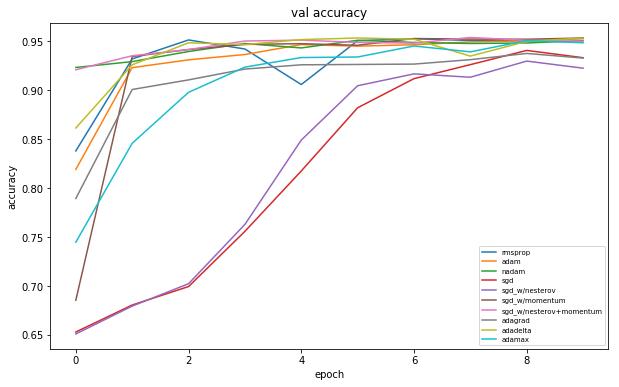

In [42]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0.4, 1))

plt.plot(hist_rmsprop.history['val_acc'])
plt.plot(hist_adam.history['val_acc'])
plt.plot(hist_nadam.history['val_acc'])
plt.plot(hist_sgd.history['val_acc'])
plt.plot(hist_sgdnesterov.history['val_acc'])
plt.plot(hist_sgdmomentum.history['val_acc'])
plt.plot(hist_sgdnestmomentum.history['val_acc'])
plt.plot(hist_adagrad.history['val_acc'])
plt.plot(hist_adadelta.history['val_acc'])
plt.plot(hist_adamax.history['val_acc'])
plt.title('val accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/momentum', 'sgd_w/nesterov+momentum', 'adagrad', 'adadelta', 'adamax'], loc='lower right',fontsize = 'x-small')  

plt.show()

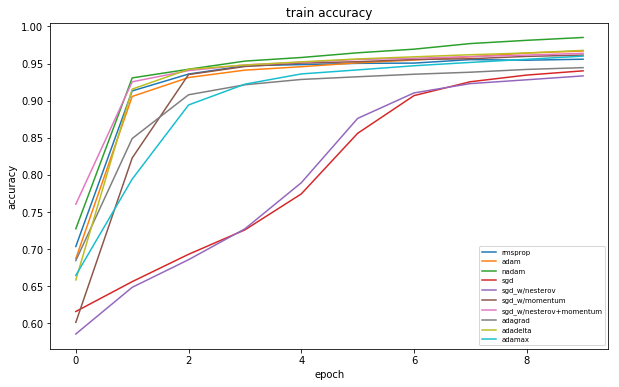

In [43]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0.4, 1))


plt.plot(hist_rmsprop.history['acc'])  
plt.plot(hist_adam.history['acc'])  
plt.plot(hist_nadam.history['acc']) 
plt.plot(hist_sgd.history['acc']) 
plt.plot(hist_sgdnesterov.history['acc']) 
plt.plot(hist_sgdmomentum.history['acc'])
plt.plot(hist_sgdnestmomentum.history['acc'])
plt.plot(hist_adagrad.history['acc'])
plt.plot(hist_adadelta.history['acc'])
plt.plot(hist_adamax.history['acc'])
plt.title('train accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/momentum', 'sgd_w/nesterov+momentum', 'adagrad', 'adadelta', 'adamax'], loc='lower right',fontsize = 'x-small')  

plt.show()

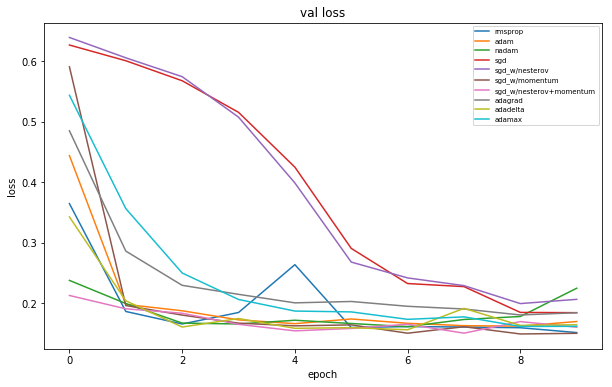

In [44]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0, 1))


plt.plot(hist_rmsprop.history['val_loss'])  
plt.plot(hist_adam.history['val_loss'])  
plt.plot(hist_nadam.history['val_loss']) 
plt.plot(hist_sgd.history['val_loss']) 
plt.plot(hist_sgdnesterov.history['val_loss']) 
plt.plot(hist_sgdmomentum.history['val_loss'])
plt.plot(hist_sgdnestmomentum.history['val_loss'])
plt.plot(hist_adagrad.history['val_loss'])
plt.plot(hist_adadelta.history['val_loss'])
plt.plot(hist_adamax.history['val_loss'])
plt.title('val loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/momentum', 'sgd_w/nesterov+momentum', 'adagrad', 'adadelta', 'adamax'], loc='upper right',fontsize = 'x-small')  

plt.show()

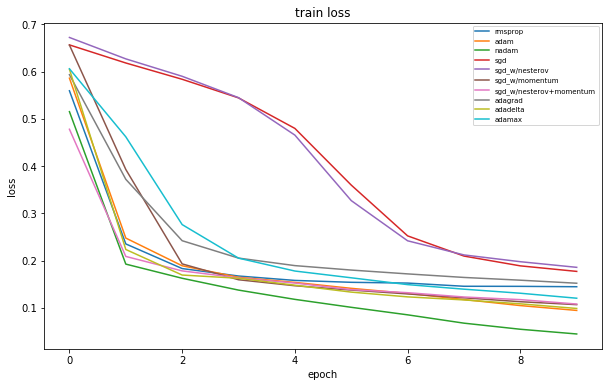

In [45]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0, 1))


plt.plot(hist_rmsprop.history['loss'])  
plt.plot(hist_adam.history['loss'])  
plt.plot(hist_nadam.history['loss']) 
plt.plot(hist_sgd.history['loss']) 
plt.plot(hist_sgdnesterov.history['loss']) 
plt.plot(hist_sgdmomentum.history['loss'])
plt.plot(hist_sgdnestmomentum.history['loss'])
plt.plot(hist_adagrad.history['loss'])
plt.plot(hist_adadelta.history['loss'])
plt.plot(hist_adamax.history['loss'])
plt.title('train loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/momentum', 'sgd_w/nesterov+momentum', 'adagrad', 'adadelta', 'adamax'], loc='upper right',fontsize = 'x-small')  

plt.show()

# Showing just the best and the worst performing after some observations

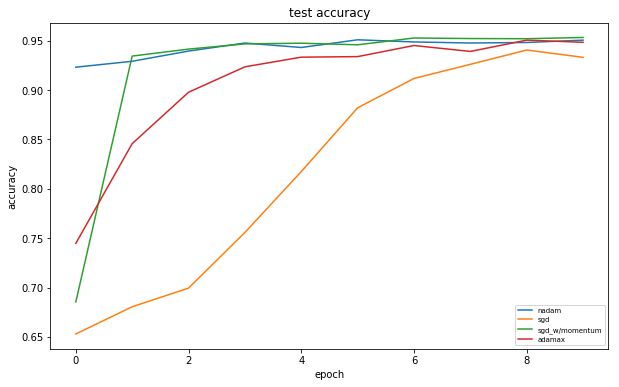

In [46]:
plt.figure(figsize=(10, 6))  

#plt.axis((-1,14,0.4, 1))


plt.plot(hist_nadam.history['val_acc'])
plt.plot(hist_sgd.history['val_acc'])
plt.plot(hist_sgdmomentum.history['val_acc'])

plt.plot(hist_adamax.history['val_acc'])
plt.title('test accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['nadam', 'sgd', 'sgd_w/momentum', 'adamax'], loc='lower right',fontsize = 'x-small')  

plt.show()

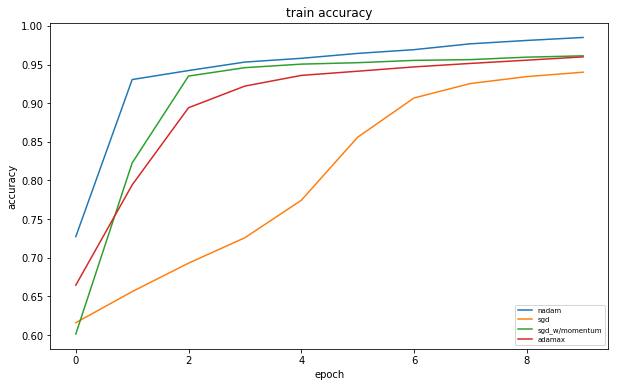

In [47]:
plt.figure(figsize=(10, 6))  

#plt.axis((-1,14,0.4, 1))
  
plt.plot(hist_nadam.history['acc']) 
plt.plot(hist_sgd.history['acc']) 
plt.plot(hist_sgdmomentum.history['acc'])

plt.plot(hist_adamax.history['acc'])
plt.title('train accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend([ 'nadam', 'sgd', 'sgd_w/momentum', 'adamax'], loc='lower right',fontsize = 'x-small')  

plt.show()

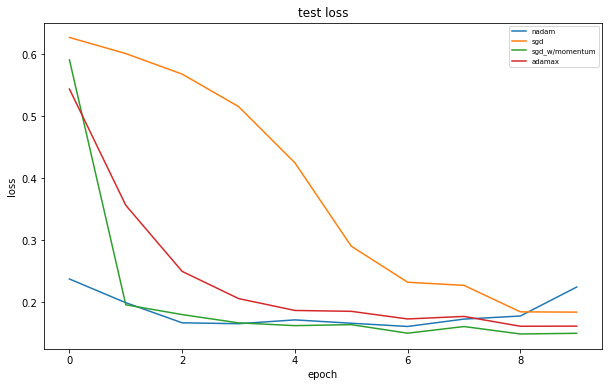

In [48]:
plt.figure(figsize=(10, 6))  


 
plt.plot(hist_nadam.history['val_loss']) 
plt.plot(hist_sgd.history['val_loss']) 
plt.plot(hist_sgdmomentum.history['val_loss'])
plt.plot(hist_adamax.history['val_loss'])
plt.title('test loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend([ 'nadam', 'sgd', 'sgd_w/momentum', 'adamax'], loc='upper right',fontsize = 'x-small')  

plt.show()

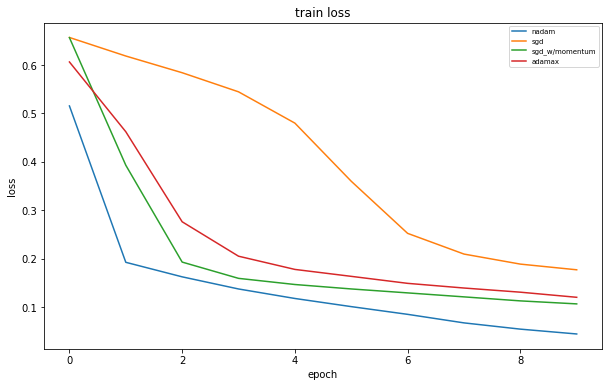

In [49]:
plt.figure(figsize=(10, 6))  
#plt.axis((-1,14,0, 1))
 
plt.plot(hist_nadam.history['loss']) 
plt.plot(hist_sgd.history['loss']) 
plt.plot(hist_sgdmomentum.history['loss'])
plt.plot(hist_adamax.history['loss'])
plt.title('train loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend([ 'nadam', 'sgd', 'sgd_w/momentum', 'adamax'], loc='upper right',fontsize = 'x-small')  

plt.show()

# Now a deeper model with better hyperparamters

In [50]:
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)


cnndeepmodel = Sequential()
# first convolution layer
cnndeepmodel.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3))) 
cnndeepmodel.add(BatchNormalization())
cnndeepmodel.add(MaxPooling2D(pool_size=2))
cnndeepmodel.add(Dropout(0.25))

#second convolution  layer
cnndeepmodel.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnndeepmodel.add(BatchNormalization())
cnndeepmodel.add(MaxPooling2D(pool_size=2))
cnndeepmodel.add(Dropout(0.5))

#Third convolution  layer
cnndeepmodel.add(Conv2D(64, kernel_size=2 ,padding="same",activation='relu'))
cnndeepmodel.add(BatchNormalization())
cnndeepmodel.add(MaxPooling2D(pool_size=2))
cnndeepmodel.add(Dropout(0.5))

#first Fully connected layer
cnndeepmodel.add(Flatten()) 
cnndeepmodel.add(Dense(256,kernel_regularizer=l2(0.001)))#activity_regularizer=l1(0.001)))
cnndeepmodel.add(BatchNormalization())
cnndeepmodel.add(Activation('relu')) 
cnndeepmodel.add(Dropout(0.5))      

#Final Fully connected layer
cnndeepmodel.add(Dense(2)) #8
cnndeepmodel.add(Activation('softmax')) 

cnndeepmodel.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

cnndeepmodel.summary()

cnndeephistory = cnndeepmodel.fit(X_train, Y_train, epochs=300,verbose=1,validation_data=(X_test, Y_test),
                                  shuffle=True,callbacks=[reduce_lr])

cnnscore = cnndeepmodel.evaluate(X_test, Y_test, verbose=0)

#loss and accuracy
print('Test loss:', cnnscore[0])
print('Test accuracy:', cnnscore[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 50, 50, 16)        208       
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 16)        64        
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 25, 25, 32)        2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 12, 12, 32)        0         
__________